In [1]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
import numpy as np
from src.gameSimulation.GameUr import GameUr, Player, Dice, GameSettings
import src.gameSimulation.Strategies as Strategies
import src.gameSimulation.Multirun as Multirun
import gameBoardDisplay as gbd

from scipy import stats


# %config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.collections as collections
import matplotlib.patches as mpatches


mplstyle.use('fast')
mplstyle.use('default')
mpl.rcParams['figure.figsize'] = [10, 20]

colors = ["lightgreen", "yellow", "red"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)


In [2]:
rs = Strategies.RandomStrategy()
mfs = Strategies.MoveFirstStrategy()
mls = Strategies.MoveLastStrategy()
p0 = Player(0, 7, mls)
p1 = Player(1, 7, mfs)
p2 = Player(2, 7, mfs)
# p3 = Player(3, 4, rs)
md2 = Dice.MultiD2Dice(4)
d4 = Dice.D4()
# gs = GameSettings([p0,p1],d,4,8,2,[8],[4,8,13],exactFinish=False)
gs0 = GameSettings([p0, p1], md2, 4, 8, 2, [8], [4, 8, 13])


In [3]:
gl = 16
grid = np.mgrid[0:1, 0:gl].reshape(2, -1).T
grid
np.mgrid[-4:0.5:.5]


array([-4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ])

[-1.5  8. ]
[-2.   7.5]


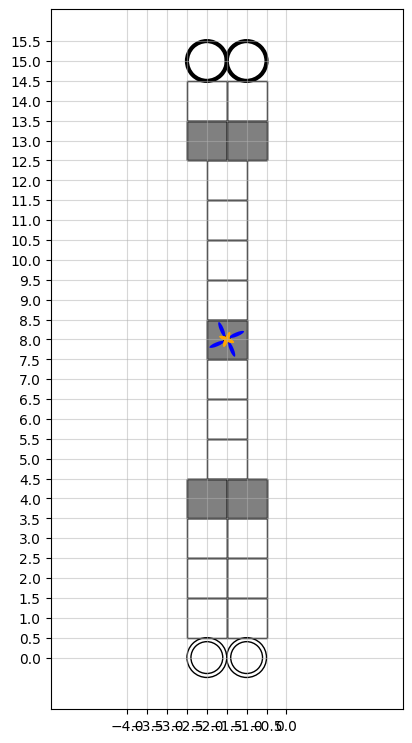

In [15]:

xy = np.array((-2.,   7.5)) + (.5, .5)
offset = np.array((.125, .125))

fco = "orange"
fcb = "blue"
print(xy)
plt.subplot(222)
gb_coll = gbd.getGameboard(
    *list(gs0.getFieldsSettings().values()), xoff=2)
ax = plt.subplot(222)
ax.add_collection(gb_coll)
ellipse = mpatches.Ellipse(xy, 0.2, .2, fc="black")
ax.add_patch(ellipse)

ellipse = mpatches.Ellipse(xy + offset * (2, 1), 0.1, .4, 22.5+45*2, fc=fcb)
ax.add_patch(ellipse)
ellipse = mpatches.Ellipse(xy - offset * (2, 1), 0.1, .4, 22.5+45*2, fc=fcb)
ax.add_patch(ellipse)

ellipse = mpatches.Ellipse(xy + offset * (-1, 2), 0.1, .4, 22.5+45*4, fc=fcb)
ax.add_patch(ellipse)
ellipse = mpatches.Ellipse(xy - offset * (-1, 2), 0.1, .4, 22.5+45*4, fc=fcb)
ax.add_patch(ellipse)

ellipse = mpatches.Ellipse(xy + offset * (2, 1), 0.1, .4, 22.5+45*3, fc=fco)
ax.add_patch(ellipse)
ellipse = mpatches.Ellipse(xy + offset * (2, 1), 0.1, .4, 22.5+45*3, fc=fco)
ax.add_patch(ellipse)

ellipse = mpatches.Ellipse(xy + offset * (2, 1), 0.1, .4, 22.5+45, fc=fco)
ax.add_patch(ellipse)
ellipse = mpatches.Ellipse(xy + offset * (2, 1), 0.1, .4, 22.5+45, fc=fco)
ax.add_patch(ellipse)

ax.set_xticks(np.mgrid[-4:0.5:.5])
ax.set_yticks(np.mgrid[0:gl:.5])
ax.set_ybound(0, 16)
ax.axis("equal")
ax.grid(True, alpha=0.5)
plt.show()
